# Average Students per Professor

This notebook calculates, for each professor, the average number of students enrolled in their courses.

Only data from the last 10 years is used \
Only the top 20 professors are shown \
Outlier courses with very high enrollment (>150) are removed \

In [11]:
%pip install -qqq matplotlib

Note: you may need to restart the kernel to use updated packages.


In [12]:
min_year = 2024-10 # Data before this year will be ignored
top = 20 # Number of top professors to show
outlier_enr = 150 # Ignore courses with enrollment above this number (outliers)

In [13]:
import matplotlib.pyplot as plt
from utils.get_all_dfs import * 

years = get_all_dfs("courses", by_year=True)

In [14]:
profs_students = {} #Format of "prof_name": [12, 20, 34] where each num is the number of students in that semester's course
for year, courses in years.items():
    #If year is too early, skip
    if int(year) < min_year: continue
    
    #Otherwise, for every course in the semester, add the number of students to the profs_students dict with key as the professor
    for index, course in courses.iterrows():
        enrolled_students = course["enr"]
        # Skip unique (outlier) courses with high enrollment
        if enrolled_students > outlier_enr: continue 
        
        prof = course["instructor"]
        if prof not in profs_students:
            profs_students[prof] = []

        #Otherwise add to prof's enrollment count list
        profs_students[prof].append(course["enr"])

<BarContainer object of 20 artists>

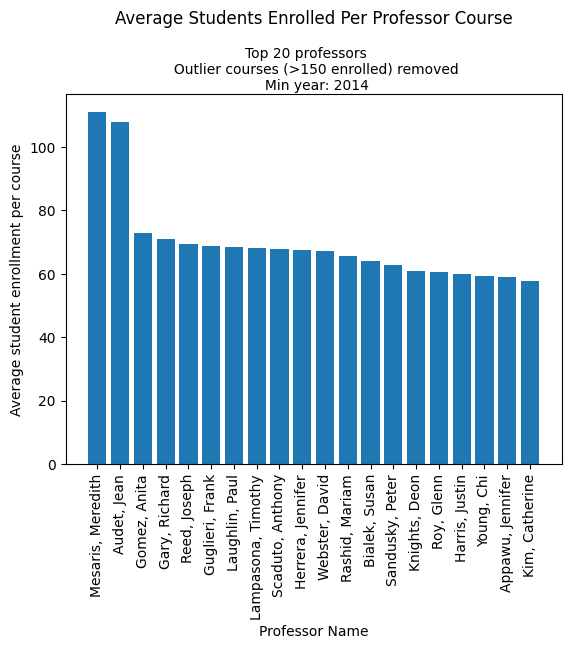

In [15]:
profs_avg_students = {prof: (sum(stu_counts)/len(stu_counts)) for (prof, stu_counts) in profs_students.items()}

# Sort the dictionary items by values in descending order
sorted_profs_avg_students = sorted(profs_avg_students.items(), key=lambda x: x[1], reverse=True)

# Take the top 5 items
top_profs = sorted_profs_avg_students[:top]
# Create a new dictionary with the top 5 items while preserving their order
top_dict = dict(top_profs)
top_prof_names = list(top_dict.keys())
top_prof_avg_students = list(top_dict.values())

#Chart setup
plt.title("Average Students Enrolled Per Professor Course\n\n\n")
plt.suptitle(f"Top {top} professors\n \
    Outlier courses (>{outlier_enr} enrolled) removed\n \
    Min year: {min_year}\n\n",
    fontsize=10)

plt.xlabel("Professor Name")
plt.ylabel("Average student enrollment per course")

# Chart styling
plt.xticks(rotation=90) # Rotate x-axis labels and align them to the right

#Show the chart
plt.bar(range(len(top_prof_names)), top_prof_avg_students, tick_label=top_prof_names)